Dự đoán nhãn của điểm mới: 2.0


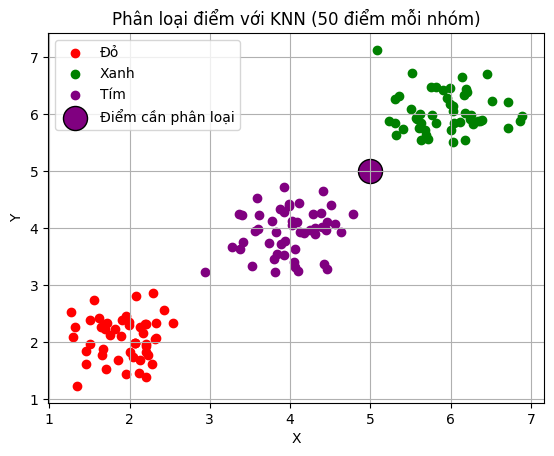

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# 1. Tạo dữ liệu gồm 50 điểm cho mỗi nhóm

# Nhóm ĐỎ
red_points = np.random.normal(loc=[2, 2], scale=0.4, size=(50, 2))
red_labels = np.zeros(50)

# Nhóm XANH
green_points = np.random.normal(loc=[6, 6], scale=0.4, size=(50, 2))
green_labels = np.ones(50)

# Nhóm Tím
purple_points = np.random.normal(loc=[4, 4], scale=0.4, size=(50, 2))
purple_labels = np.full(50, 2)

# Gộp toàn bộ dữ liệu
X = np.vstack((red_points, green_points, purple_points))
y = np.concatenate((red_labels, green_labels, purple_labels))

# 2. Huấn luyện mô hình KNN

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# 3. Dự đoán 1 điểm bất kỳ

new_point = np.array([[5, 5]])
pred = knn.predict(new_point)
print("Dự đoán nhãn của điểm mới:", pred[0])

# 4. Vẽ biểu đồ

plt.scatter(red_points[:, 0], red_points[:, 1], color='red', label='Đỏ')
plt.scatter(green_points[:, 0], green_points[:, 1], color='green', label='Xanh')
plt.scatter(purple_points[:, 0], purple_points[:, 1], color='purple', label='Tím')

# Vẽ điểm mới
colors = ['red', 'green', 'purple']
plt.scatter(new_point[0, 0], new_point[0, 1],
            color=colors[int(pred[0])],
            edgecolor='black',
            s=300,
            label='Điểm cần phân loại')

plt.legend()
plt.title("Phân loại điểm với KNN (50 điểm mỗi nhóm)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


Dùng Scikit-learn để thử nghiệm


In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

X = mnist.data
y = mnist.target

print(X.shape)

(70000, 784)


In [8]:
#Tải bộ dữ liệu MNIST
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Train:", X_train.shape, y_train.shape)
print("Test :", X_test.shape, y_test.shape)
#KNN yêu cầu dữ liệu dạng vector, nên ta flatten ảnh 28×28 → 784
# Chuyển sang dạng float và chuẩn hóa về [0,1]
X_train = X_train.reshape(60000, 784).astype("float32") / 255.0
X_test  = X_test.reshape(10000, 784).astype("float32") / 255.0

print("Train:", X_train.shape)
print("Test :", X_test.shape)

#Huấn Luyện Mô Hình
from sklearn.neighbors import KNeighborsClassifier

# Tạo mô hình KNN với K = 3
knn = KNeighborsClassifier(n_neighbors=3)

# Huấn luyện
print("Đang huấn luyện KNN (có thể hơi lâu)...")
knn.fit(X_train, y_train)

print("Huấn luyện xong!")

#Dự đoán và đánh giá
from sklearn.metrics import accuracy_score, classification_report

y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Độ chính xác KNN:", acc)

print("\nBáo cáo phân loại:\n")
print(classification_report(y_test, y_pred))

Train: (60000, 28, 28) (60000,)
Test : (10000, 28, 28) (10000,)
Train: (60000, 784)
Test : (10000, 784)
Đang huấn luyện KNN (có thể hơi lâu)...
Huấn luyện xong!
Độ chính xác KNN: 0.9705

Báo cáo phân loại:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



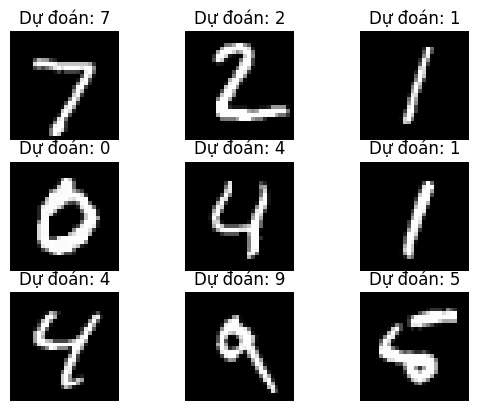

In [9]:
#Ví dụ minh họa vài ảnh MNIST và dự đoán
import matplotlib.pyplot as plt

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap="gray")
    plt.title("Dự đoán: " + str(y_pred[i]))
    plt.axis("off")